## A Visual History of the Nobel Prizes

### Alan T / 2022

In this project, I use data cleaning, manipulation, analysis and visualization tools to uncover insights of the Nobel Prizes since their conception in 1901. 

This project is based of DataCamp's project plus additional insights driven by curiosity.

The data is publicly available from Kaggle: [Nobel Laurates, 1901-Present](https://www.kaggle.com/datasets/nobelfoundation/nobel-laureates)

Tools used: Pandas, NumPy, Seaborn, Datetime, Msno

In [26]:
# I begin by importing the necessary packages to perform analysis, manipulation and visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import numpy as np

In [2]:
# Importing the dataset

data = pd.read_csv("nobel.csv")

data.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
# Display of the total number of Nobel Prizes handed out (this number includes possible shared prizes)
# using the len function

display(len(data))

969

In [4]:
# Analyze the distribution of prizes per category 

data.value_counts(subset = "Category")

Category
Medicine      227
Physics       222
Chemistry     194
Peace         130
Literature    113
Economics      83
dtype: int64

[Text(0.5, 1.0, 'Prizes per category'), Text(0, 0.5, '# of prizes')]

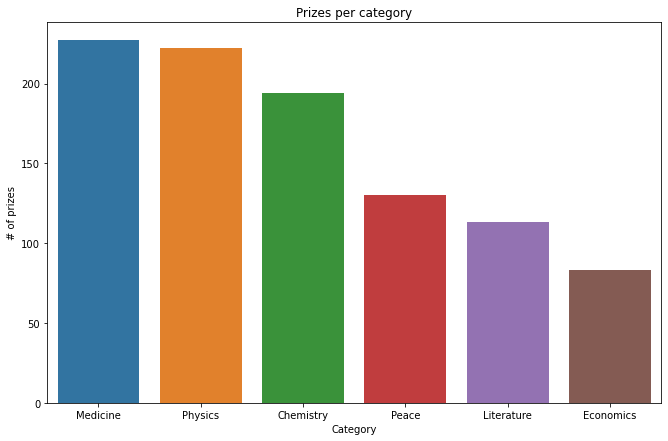

In [5]:
# Visualize the proportion of Nobel's awarded per category

plt.rcParams["figure.figsize"] = [11,7]
cat_count = sns.countplot(data = data, x = "Category", order = data["Category"].value_counts().index)
cat_count.set(title= "Prizes per category", ylabel= "# of prizes")

Medicine and Phyisics are by far the categories with the most Nobel Prizes awarded. Economics is the category with the least amount.. would it be because of it's recent addition to the Nobel categories?

In [6]:
# Investigating the sex distribution between Nobel Laurates

display(data["Sex"].value_counts())

Male      893
Female     50
Name: Sex, dtype: int64

In [7]:
# Investigating in the distribution of the top 10 countries of origin of the Nobel Laurates

data["Birth Country"].value_counts().head(10)

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Name: Birth Country, dtype: int64

USA has the highest amount of Nobel Laurates. When did USA gained dominance over the other countries?

In [8]:
# I will create a "decade" integer column and then I´ll analyze the decades to reveal when did the USA gained dominance

data["decade"] = (np.floor(data["Year"]/10)*10).astype(int)

In [9]:
# I can now create a new column that will store boolean values (True/False) on wether or not a Nobel Laurate was born
# in the US. Then, I can group by decade and calculate the mean of USA winners / total winners %. 

data["usa_winner"] = data["Birth Country"] == "United States of America"
usa_winners = data.groupby(["decade"], as_index = False)["usa_winner"].mean()
usa_winners

,decade,usa_winner
0,1900,0.017241
1,1910,0.075000
2,1920,0.074074
3,1930,0.241935
4,1940,0.288889
5,1950,0.278481
6,1960,0.262500
7,1970,0.308411
8,1980,0.313131
9,1990,0.392523


In [10]:
# I calculate the proportion of non-USA born Laurates
data["other_winners"] = data["Birth Country"] != "United States of America"
other_winners = data.groupby(["decade"], as_index = False)["other_winners"].mean()
other_winners

,decade,other_winners
0,1900,0.982759
1,1910,0.925000
2,1920,0.925926
3,1930,0.758065
4,1940,0.711111
5,1950,0.721519
6,1960,0.737500
7,1970,0.691589
8,1980,0.686869
9,1990,0.607477


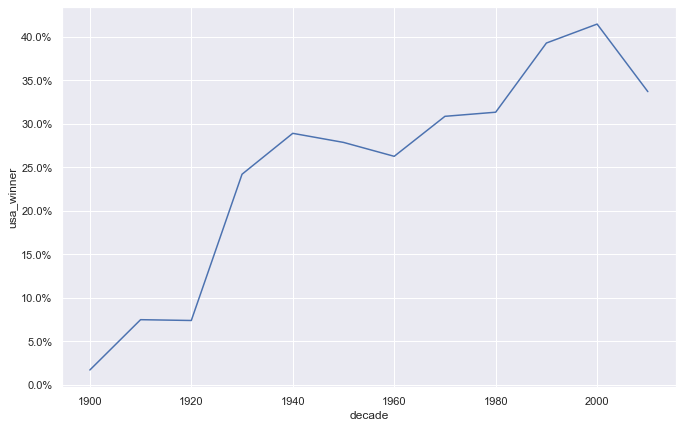

In [11]:
# I will create a seaborn lineplot to better visualize the usa_winners over time
# Setting the figure size:
sns.set()
plt.rcParams["figure.figsize"] = [11,7]

# Creating the plot and formatting the y axis to show percentages without decimals

usa_prop = sns.lineplot(data = usa_winners, x = "decade", y = "usa_winner")
usa_prop.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.show()

This graph shows the % of the total Nobel Laurates born in the US vs other countries. USA winners begin gaining ground in the 1930´s and have continue gaining ground since then. 

In [12]:
# I will investigate the proportion of Female Laurates per decade and prize category

data["female_winner"] = data["Sex"] == "Female"
female_prop = data.groupby(["decade","Category"], as_index = False)["female_winner"].mean()
female_prop

,decade,Category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
61,2010,Economics,0.000000
62,2010,Literature,0.285714
63,2010,Medicine,0.100000
64,2010,Peace,0.400000


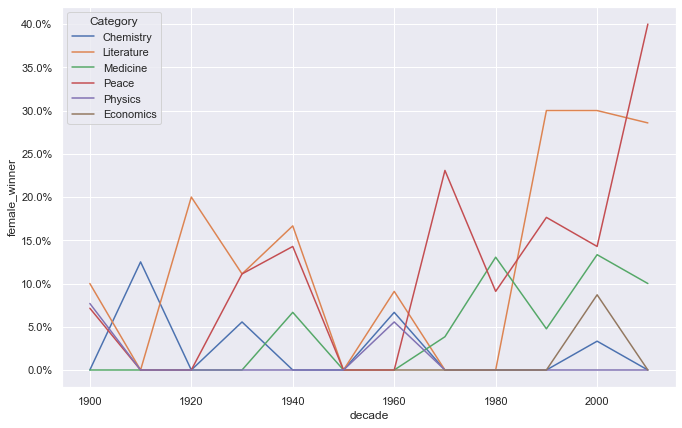

In [13]:
# I will plot the proportion of women laurates by decade and category 

plt.rcParams["figure.figsize"] = [11,7]
female_winners = sns.lineplot(data = female_prop, x = "decade", y = "female_winner", hue = "Category")
female_winners.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.show()

The proportion of women Laurates is low compared to men through all of the categories. However, Peace and Literature have the highest proportion of women Laurates. 

In [14]:
# I can determine who was the first 3 women to get a Nobel prize. To do so, I will use the nsmallest method, passing as 
# arguments "3" and "Year" (to select the 3 smalles years in the dataset)

data[data["female_winner"] == True].nsmallest(3,"Year")

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,decade,usa_winner,other_winners,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900,False,True,True
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,...,NaN,NaN,NaN,1914-06-21,Vienna,Austria,1900,False,True,True
52,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,...,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden,1900,False,True,True


In [25]:
# I will determine who are the Nobel Laurates that have received multiple prizes. To achieve this, I´ll group the 
# data by "Full Name" and pass a lambda function to filter those who have more than 1 appearance through the 
# data set

multiple_winners = data.groupby(["Full Name"]).filter(lambda x :len(x) > 1)
multiple_winners.head(10)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,decade,usa_winner,other_winners,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900,False,True,True
46,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Goettingen University,Göttingen,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,1900,False,True,False
47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,1900,False,True,False
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,1910,False,True,True
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1910,False,True,False
157,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,189,Individual,Carl Bosch,1874-08-27,Cologne,...,University of Heidelberg,Heidelberg,Germany,1940-04-26,Heidelberg,Germany,1930,False,True,False
158,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,189,Individual,Carl Bosch,1874-08-27,Cologne,...,I.G. Farbenindustrie A.G.,Heidelberg,Germany,1940-04-26,Heidelberg,Germany,1930,False,True,False
159,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,190,Individual,Friedrich Bergius,1884-10-11,"Goldschmieden, near Breslau",...,University of Heidelberg,Heidelberg,Germany,1949-03-30,Buenos Aires,Argentina,1930,False,True,False
160,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,190,Individual,Friedrich Bergius,1884-10-11,"Goldschmieden, near Breslau",...,I.G. Farbenindustrie A.G.,Mannheim-Rheinau,Germany,1949-03-30,Buenos Aires,Argentina,1930,False,True,False
179,1934,Medicine,The Nobel Prize in Physiology or Medicine 1934,"""for their discoveries concerning liver therap...",1/3,328,Individual,William Parry Murphy,1892-02-06,"Stoughton, WI",...,Harvard University,"Cambridge, MA",United States of America,1987-10-09,"Brookline, MA",United States of America,1930,True,False,False


This subset shows all of the Nobel Laurates that have their name repeated in the dataset, meaning that they have won more than 1 prize.

Lambda functions are quite helpful for this type of subsetting data since it allows to subset on each rows conditions.

In [16]:
import missingno as msno

In [24]:
year_sorted = data.sort_values(by = ["Sex","Category"])
year_sorted.head(5)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,decade,usa_winner,other_winners,female_winner
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,1910,False,True,True
183,1935,Chemistry,The Nobel Prize in Chemistry 1935,"""in recognition of their synthesis of new radi...",1/2,194,Individual,Irène Joliot-Curie,1897-09-12,Paris,...,Institut du Radium,Paris,France,1956-03-17,Paris,France,1930,False,True,True
370,1964,Chemistry,The Nobel Prize in Chemistry 1964,"""for her determinations by X-ray techniques of...",1/1,230,Individual,Dorothy Crowfoot Hodgkin,1910-05-12,Cairo,...,"University of Oxford, Royal Society",Oxford,United Kingdom,1994-07-29,Shipston-on-Stour,United Kingdom,1960,False,True,True
856,2009,Chemistry,The Nobel Prize in Chemistry 2009,"""for studies of the structure and function of ...",1/3,843,Individual,Ada E. Yonath,1939-06-22,Jerusalem,...,Weizmann Institute of Science,Rehovot,Israel,NaN,NaN,NaN,2000,False,True,True
857,2009,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for her analysis of economic governance, espe...",1/2,846,Individual,Elinor Ostrom,1933-08-07,"Los Angeles, CA",...,Indiana University,"Bloomington, IN",United States of America,2012-06-12,"Bloomington, IN",United States of America,2000,True,False,True


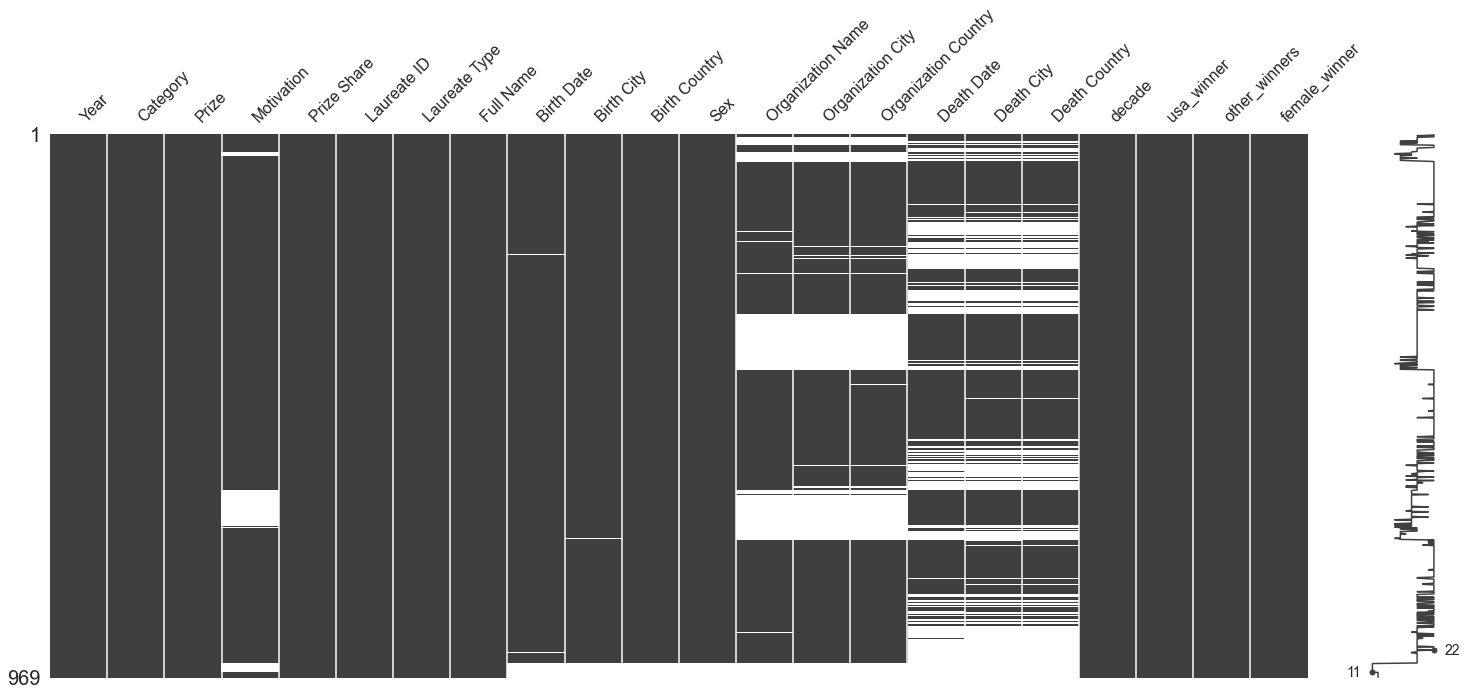

In [18]:
msno.matrix(year_sorted)
plt.show()

With the msno matrix I can visually inspect the data for missing values. In this case, I played around a while with the colu,ns to sort by the data in order to find a clear pattern. After a few tries, I found that Organization Name, City and Country are the columns with the most missing values, specifically for two determined time frames. 

I can also see that the death date, city and country are incomplete, assuming that a big percentage of the Laurates is still alive. 

In [19]:
# Since I have missing birth dates, which I cannot estimate with an average or additional context, I will create a duplicate
# dataset where the missing values are dropped

missing_birth = data[data["Birth Date"].isna()]
complete_birth = data[~data["Birth Date"].isna()]

C:\Users\Alan\AppData\Local\Temp/ipykernel_2212/1468099663.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_birth["Birth Date"] = pd.to_datetime(complete_birth["Birth Date"], infer_datetime_format = True,errors = "coerce")
C:\Users\Alan\AppData\Local\Temp/ipykernel_2212/1468099663.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_birth["age"] = complete_birth["Year"] - complete_birth["Birth Date"].dt.year


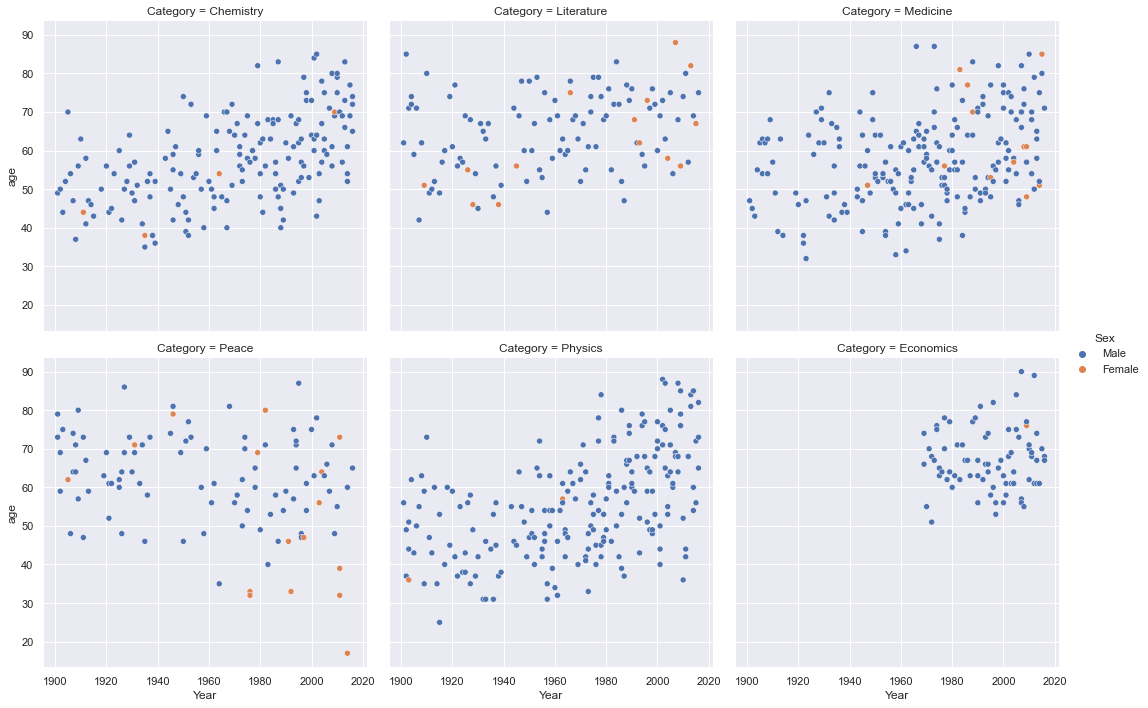

In [21]:
# I can now  analyze the age distribution of the Nobel Laurates and visualize them in a scatterplot, differentiating
# each Laurate's sex as well using the duplicate dataset with the complete birthdates

# I first convert the birth from string into a date time object. I will only include dates that ca be converted into the 
# specified Y-MM-DD format by passing errors = "coerce" 
complete_birth["Birth Date"] = pd.to_datetime(complete_birth["Birth Date"], infer_datetime_format = True,errors = "coerce")

# With this done, I can now calculate the age of each Laurate by substracting the difference in years of the 
# award year - the birth year
complete_birth["age"] = complete_birth["Year"] - complete_birth["Birth Date"].dt.year

# PLot of the age distribution

nobel_age = sns.relplot(data = complete_birth, x = "Year", y = "age", hue = "Sex", kind = "scatter", col = "Category", 
                        col_wrap = 3)
plt.show()

This set of plots reveal quite a lot of information! The economics prizes didnt exist before 1960, and the age distribution of that category is well above 50 years old, with none of the winners below that age!


In contrast, the peace category has the youngest winner, a woman,  with less than 20 years old!

In [23]:
# After visualizing the age distribution, I can now identify who are the oldest and the youngest Nobel Laurates

oldest = complete_birth.nlargest(1,"age")
youngest = complete_birth.nsmallest(1, "age")

display(oldest)
display(youngest)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization City,Organization Country,Death Date,Death City,Death Country,decade,usa_winner,other_winners,female_winner,age
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,2000,False,True,False,90.0


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization City,Organization Country,Death Date,Death City,Death Country,decade,usa_winner,other_winners,female_winner,age
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,2010,False,True,True,17.0


### Conclusions

This has been a fun and useful project where I could apply data manipulation, cleaning, analysis and visualization skills on an interesting topic dataset. While doing so, I learnt a few take aways:

- There have been 969 prizes across 6 categories, of which Medicine and Physics have the most received.
- USA is the predominant country to win Nobel Prizes since the 1930s
- Men have won much more prizes than women, however, woman have a higher proportion in Peace and Literature prizes vs other categories.
- The majority of winners across most categories are above 30 years old, except for the Peace and Physics categories that hold 1 winner below 30. The age distribution has been getting older with each decade that passess. 
- The first economics prize was handed out in 1969, well after the other 5 categories began receiving awards. 
- The youngest winner is Malala, a woman from Mingora who won the Peace Nobel price at her 17 years old!


Thank you for reading! Comments, code suggestions and feedback are very welcomed!